# Sklearn

# Визуализация данных

In [1]:
from sklearn import datasets

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Загрузка выборки

In [3]:
digits  =  datasets.load_digits()

In [ ]:
print digits.DESCR

In [ ]:
print 'target:', digits.target[0]
print 'features: \n', digits.data[0] 
print 'number of features:', len(digits.data[0])

## Визуализация объектов выборки

In [ ]:
#не будет работать: Invalid dimensions for image data
pylab.imshow(digits.data[0])

In [ ]:
digits.data[0].shape

In [ ]:
print digits.data[0].reshape(8,8)

In [ ]:
digits.data[0].reshape(8,8).shape

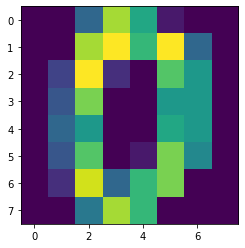

In [4]:
pylab.imshow(digits.data[0].reshape(8,8))

In [ ]:
print digits.keys()

In [ ]:
print digits.images[0]

In [ ]:
pylab.imshow(digits.images[0])

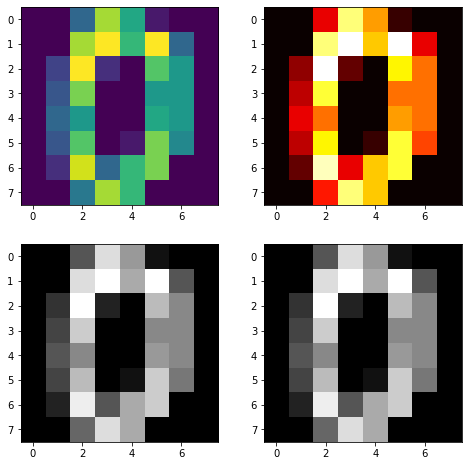

In [5]:
pyplot.figure(figsize(8, 8))

pyplot.subplot(2, 2, 1)
pylab.imshow(digits.images[0])

pyplot.subplot(2, 2, 2)
pylab.imshow(digits.images[0], cmap = 'hot')

pyplot.subplot(2, 2, 3)
pylab.imshow(digits.images[0], cmap = 'gray')

pyplot.subplot(2, 2, 4)
pylab.imshow(digits.images[0], cmap = 'gray', interpolation = 'nearest')

In [ ]:
pyplot.figure(figsize(20, 8))

for plot_number, plot in enumerate(digits.images[:10]):
    pyplot.subplot(2, 5, plot_number + 1)
    pylab.imshow(plot, cmap = 'gray')
    pylab.title('digit: ' + str(digits.target[plot_number]))

## Уменьшение размерности

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from collections import  Counter

In [7]:
data = digits.data[:1000]
labels = digits.target[:1000]

In [ ]:
print Counter(labels)

<BarContainer object of 10 artists>

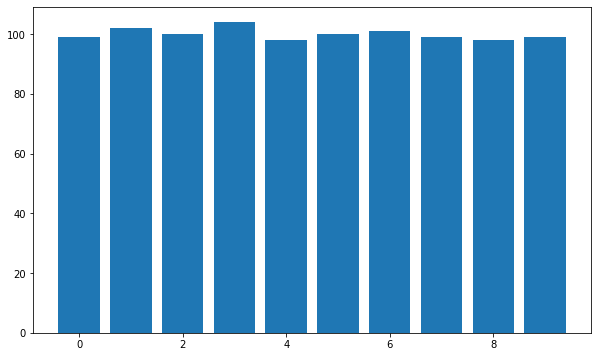

In [8]:
pylab.figure(figsize = (10, 6))
pylab.bar(Counter(labels).keys(), Counter(labels).values())

In [ ]:
classifier = KNeighborsClassifier()

In [ ]:
classifier.fit(data, labels)

In [ ]:
print classification_report(classifier.predict(data), labels)

### Random projection

In [ ]:
from sklearn import random_projection

In [ ]:
projection = random_projection.SparseRandomProjection(n_components = 2, random_state = 0)
data_2d_rp = projection.fit_transform(data)

In [ ]:
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_rp[:, 0], data_2d_rp[:, 1], c = labels)

In [ ]:
classifier.fit(data_2d_rp, labels)
print classification_report(classifier.predict(data_2d_rp), labels)

### PCA

In [ ]:
from sklearn.decomposition import RandomizedPCA

In [ ]:
pca = RandomizedPCA(n_components = 2, random_state = 0)
data_2d_pca = pca.fit_transform(data)

In [ ]:
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c = labels)

In [ ]:
classifier.fit(data_2d_pca, labels)
print classification_report(classifier.predict(data_2d_pca), labels)

### MDS

In [ ]:
from sklearn import manifold

In [ ]:
mds = manifold.MDS(n_components = 2, n_init = 1, max_iter = 100)
data_2d_mds = mds.fit_transform(data)

In [ ]:
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_mds[:, 0], data_2d_mds[:, 1], c = labels)

In [ ]:
classifier.fit(data_2d_mds, labels)
print classification_report(classifier.predict(data_2d_mds), labels)

### t- SNE

In [ ]:
tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
data_2d_tsne = tsne.fit_transform(data)

In [ ]:
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c = labels)

In [ ]:
classifier.fit(data_2d_tsne, labels)
print classification_report(classifier.predict(data_2d_tsne), labels)